In [1]:
import Datasets

In [34]:
data_path = './data/raleigh/'
dump_path =  './results/'
data_dump_path =  './results/'

train_data, test_data = Datasets.load(data_path, data_dump_path)

/Users/zdc6/Desktop/twitter/sPFA/Datasets/twitter.py:249: RuntimeWarning: divide by zero encountered in long_scalars
  w = [np.float32(1 / e) for e in eff_label_dist]
/Users/zdc6/Desktop/twitter/sPFA/Datasets/twitter.py:250: RuntimeWarning: invalid value encountered in divide
  return w / np.sum(w)


<BarContainer object of 21 artists>

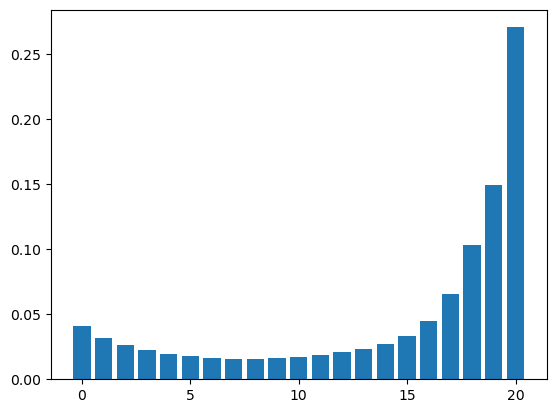

In [8]:
from matplotlib import pyplot as plt
plt.bar(range(len(train.LDS.weights)), train.LDS.weights)

In [9]:
import os
f = os.listdir('~/Desktop/twitter/sPFA/data/raleigh/')

AttributeError: module 'os' has no attribute 'listdirs'

In [11]:
import pandas as pd

df = pd.read_csv('./results/debug/performance.csv')
df.head()

,stage,epoch,loss,pnll,mse,kld,time,kld_weight
0,train,0,57.393106,27.761732,29.631374,32.919098,0.026074,0.00
1,test,0,68.977505,14.578708,54.398796,0.000000,0.000056,0.00
2,train,1,25.385951,12.430481,12.162876,79.259456,0.025338,0.01
3,test,1,114.372944,9.599406,104.773537,0.000000,0.000055,0.01
4,train,2,18.735734,7.323272,8.868262,127.209990,0.027087,0.02


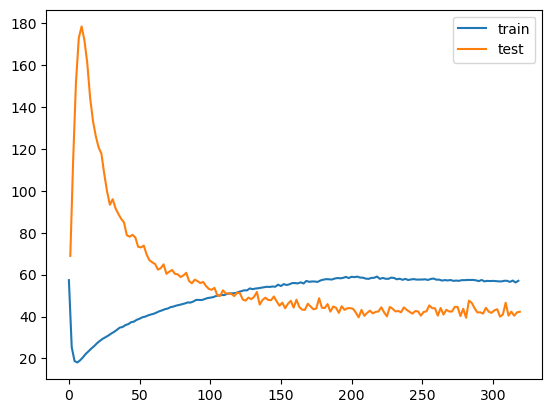

In [14]:
train = df[df['stage'] == 'train']
test = df[df['stage'] == 'test']
plt.plot(train['loss'], label='train')
plt.plot(test['loss'], label='test')
plt.legend()

In [15]:
import torch

In [18]:
state_dict = torch.load('./results/debug/best.pt')

In [22]:
import joblib
cv = joblib.load('./results/1000/1/0.05/0.8/cv.joblib')

In [25]:
import Models
model = Models.load('base', {
    'vocab': len(cv.vocabulary_),
    'num_components': 50
})

In [26]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [35]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [54]:
all_ys = []
preds = []
all_mus = []
with torch.no_grad():
    for i, (X, y, w) in enumerate(train_loader):
        all_ys.extend(y.numpy())
        recon, y_hat, mu, logvar = model(X)
        preds.extend(y_hat.numpy())
        all_mus.extend(mu.numpy())



In [57]:
# Convert to numpy
import numpy as np
all_ys = np.array(all_ys)
preds = np.array(preds)
all_mus = np.array(all_mus)

In [67]:
# Analyze the output values
all_mus.mean(axis=0)

array([-0.6823025 , -0.65356076, -0.7671593 , -0.6776243 , -0.609255  ,
       -0.6100239 , -0.72163796, -0.7741623 , -0.63629645, -0.7674055 ,
       -0.74334556, -0.65342754, -0.77438706, -0.60813385, -0.6311821 ,
       -0.7425219 , -0.74906206, -0.632451  , -0.62778425, -0.63992316,
       -0.6715553 , -0.6389748 , -0.62554914, -0.73443323, -0.8102192 ,
       -0.7026209 , -0.71561503, -0.74136746, -0.66782224, -0.6835369 ,
       -0.6669026 , -0.7631065 , -0.7981815 , -0.7518059 , -0.58381104,
       -0.7885264 , -0.7914648 , -0.6940112 , -0.64433944, -0.64800143,
       -0.72086954, -0.7601166 , -0.7973063 , -0.6528222 , -0.79201424,
       -0.6708417 , -0.7489855 , -0.76977056, -0.626215  , -0.82776356],
      dtype=float32)

<BarContainer object of 301 artists>

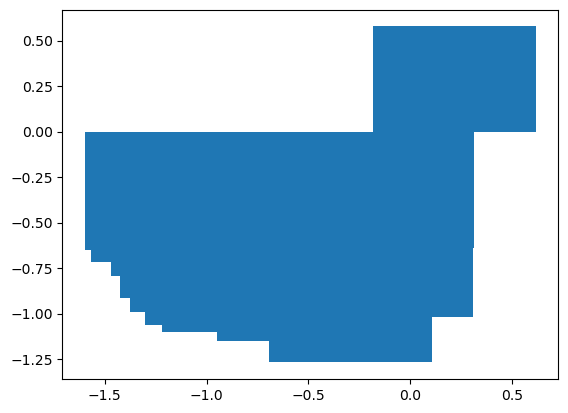

In [66]:
plt.bar(all_mus[:, 0], all_mus[:, 1])

In [51]:
import numpy as np
all_ys = np.array(all_ys)
preds = np.array(preds)
all_mus = np.array(all_mus)

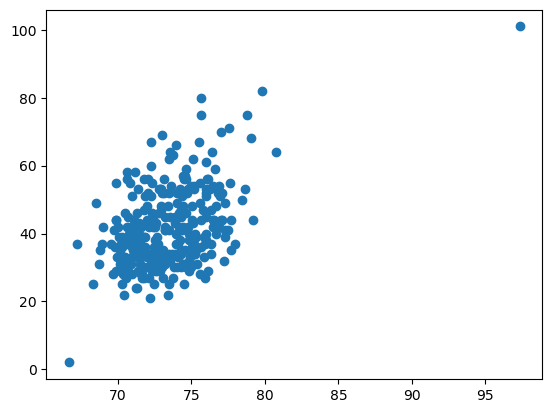

In [49]:
plt.scatter(preds, all_ys)

In [53]:
all_mus.shape

(301, 7695)